# Singapore Consumer Price Index (CPI)
The CPI is designed to measure the average price changes of a fixed basket of consumption goods and services commonly purchased by resident households over time. It is widely used as a measure of consumer price inflation.<br>
<br>
The weighting pattern for the 2019-based CPI was derived from the expenditure values obtained from the Household Expenditure Survey conducted between Oct 2017 and Sep 2018, and updated to 2019 values by taking into account price changes between 2017/18 and 2019. <br>
In short, 2019 is taken as the base year here.


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.patches import Rectangle
from datetime import datetime
from matplotlib import dates as mdates
from dateutil.relativedelta import relativedelta

#uncomment for interactive plots
#from mplcursors import cursor #add curcor(hover = True) at tend of plot to enable tooltip
#%matplotlib 


## Prompts
1. Overall time series trend for each cateogry (2019 - 2023)
2. Sub-category trends from 2019 to 2023 
3. MOM and YOY percentage changes 

### Importing data

In [2]:
#loading the Dataframe
raw = pd.read_csv('CPI_raw_data_clean.csv',index_col=[1,2],skiprows=10)

#copying to new df, so thaat dont have to read from csv again
raw_df = raw.copy()
raw_df.dropna(inplace = True) 
raw_df

Data Series  \
Category                                           Sub_Category                                                                                            
All Items                                          All Items                                                                                   All Items   
Food                                               All Food                                                                                         Food   
Food Excl Food Serving Services                    All Food Excl Food Serving Services                                   Food Excl Food Serving Services   
                                                   Bread & Cereals                                                                       Bread & Cereals   
                                                   Meat                                                                                             Meat   
                                                   Fish & Seafood                                                                         Fish & Seafood   
                                                   Milk, Cheese & Eggs                                                               Milk, Cheese & Eggs   
                                                   Oils & Fats                                                                               Oils & Fats   
                                                   Fruits                                                                                         Fruits   
                                                   Vegetables                                                                                 Vegetables   
                                                   Sugar, Preserves & Confectionery                                     Sugar, Preserves & Confectionery   
                                                   Non-Alcoholic Beverages                                                       Non-Alcoholic Beverages   
                                                   Other Food                                                                                 Other Food   
Food Serving Services                              All Food Serving Services                                                       Food Serving Services   
                                                   Restaurant Food                                                                       Restaurant Food   
                                                   Fast Food                                                                                   Fast Food   
                                                   Hawker Food                                                                               Hawker Food   
                                                   Catered Food                                                                             Catered Food   
Clothing & Footwear                                All Clothing & Footwear                                                           Clothing & Footwear   
                                                   Clothing                                                                                     Clothing   
                                                   Other Articles & Related Services                                   Other Articles & Related Services   
                                                   Footwear                                                                                     Footwear   
Housing & Utilities                                All Housing & Utilities                                                           Housing & Utilities   
                                                   Accommodation                                                                           Accommodation   
                                                   Utilities & Other Fuels           

### Data Exploration

In [3]:
cat = raw_df.index.get_level_values(0)
sub_cat = raw_df.index.get_level_values(1)
print(cat.unique(), 'no. of unique categories:', cat.nunique())
print(sub_cat.unique(), 'no. of unique sub-categories:', sub_cat.nunique())

Index(['All Items', 'Food', 'Food Excl Food Serving Services',
       'Food Serving Services', 'Clothing & Footwear', 'Housing & Utilities',
       'Household Durables & Services', 'Health Care', 'Transport',
       'Communication', 'Recreation & Culture', 'Education',
       'Miscellaneous Goods & Services',
       'All Items Less Imputed Rentals On Owner-Occupied Accommodation',
       'All Items Less Accommodation'],
      dtype='object', name='Category') no. of unique categories: 15
Index(['All Items', 'All Food', 'All Food Excl Food Serving Services',
       'Bread & Cereals', 'Meat', 'Fish & Seafood', 'Milk, Cheese & Eggs',
       'Oils & Fats', 'Fruits', 'Vegetables',
       'Sugar, Preserves & Confectionery', 'Non-Alcoholic Beverages',
       'Other Food', 'All Food Serving Services', 'Restaurant Food',
       'Fast Food', 'Hawker Food', 'Catered Food', 'All Clothing & Footwear',
       'Clothing', 'Other Articles & Related Services', 'Footwear',
       'All Housing & Utilities

There are **13 unique categories** and  **57 unique sub-categories** in the dataframe <br>
Categories (exclude "All items" and "All Food"):
1. Food Excl Food Serving Services
2. Food Serving Services
3. Clothing & Footwear
4. Housing & Utilities
5. Household Durables & Services
6. Health Care 
7. Transport
8. Communication
9. Recreation & Culture
10. Education
11. Miscellaneous Goods & Services
12. All Items Less Imputed Rentals On Owner-Occupied Accommodation
13. All Items Less Accommodation
     

In [5]:
# convert date columns to datetime dtype
raw_df.columns = raw_df.columns[:1].tolist() + pd.to_datetime(raw_df.columns[1:]).tolist()

#function to input start date and end date as string (yyyy-mm-dd) 
#and plot graph accordingly 
def variable_date_all_plot (start, end):
    startdate = datetime.strptime(start, '%Y-%m-%d')
    enddate = datetime.strptime(end, '%Y-%m-%d')
    x= 0
    for i in raw_df.columns[1:].tolist(): 
        x = x+1
        if i == startdate:
            start_pos = x+1
        elif i == enddate:
            end_pos = x-1 
    
    #plotting only "all *" items        
    for item in sub_cat:
        if "All" in item:
            col = raw_df.columns[1:61]
            row = raw_df.xs(item, level =1).values[end_pos,1:start_pos] #use .xs for multiindex
            ax = plt.plot(col, row, label = item)
    return (ax)

C:\Users\yeexu\AppData\Local\Temp\ipykernel_32436\2672470978.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_df.columns = raw_df.columns[:1].tolist() + pd.to_datetime(raw_df.columns[1:]).tolist()


Creatting function for dual x axis [credits](https://stackoverflow.com/questions/67582913/plotting-time-series-in-matplotlib-with-month-names-ex-january-and-showing-ye)

In [6]:
#function to create dual x axis for month and year
def format_plot ():
    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    # Minor ticks every year.
    fmt_year = mdates.YearLocator()

    ax.xaxis.set_minor_locator(fmt_month)
    # '%b' to get the names of the month
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(fmt_year)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # fontsize for month labels
    ax.tick_params(labelsize=12, axis = 'x' , which='both',labelrotation=45)
    # fontsize for y axis 
    ax.tick_params(labelsize=12, axis = 'y')

    # create a second x-axis beneath the first x-axis to show the year in YYYY format
    sec_xaxis = ax.secondary_xaxis(-0.05)
    sec_xaxis.xaxis.set_major_locator(fmt_year)
    sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Hide the second x-axis spines and ticks
    sec_xaxis.spines['bottom'].set_visible(False)
    sec_xaxis.tick_params(length=0, labelsize=20)

    plt.grid("major")
    plt.legend(loc = 'upper left', fontsize =15)   
    plt.tight_layout()

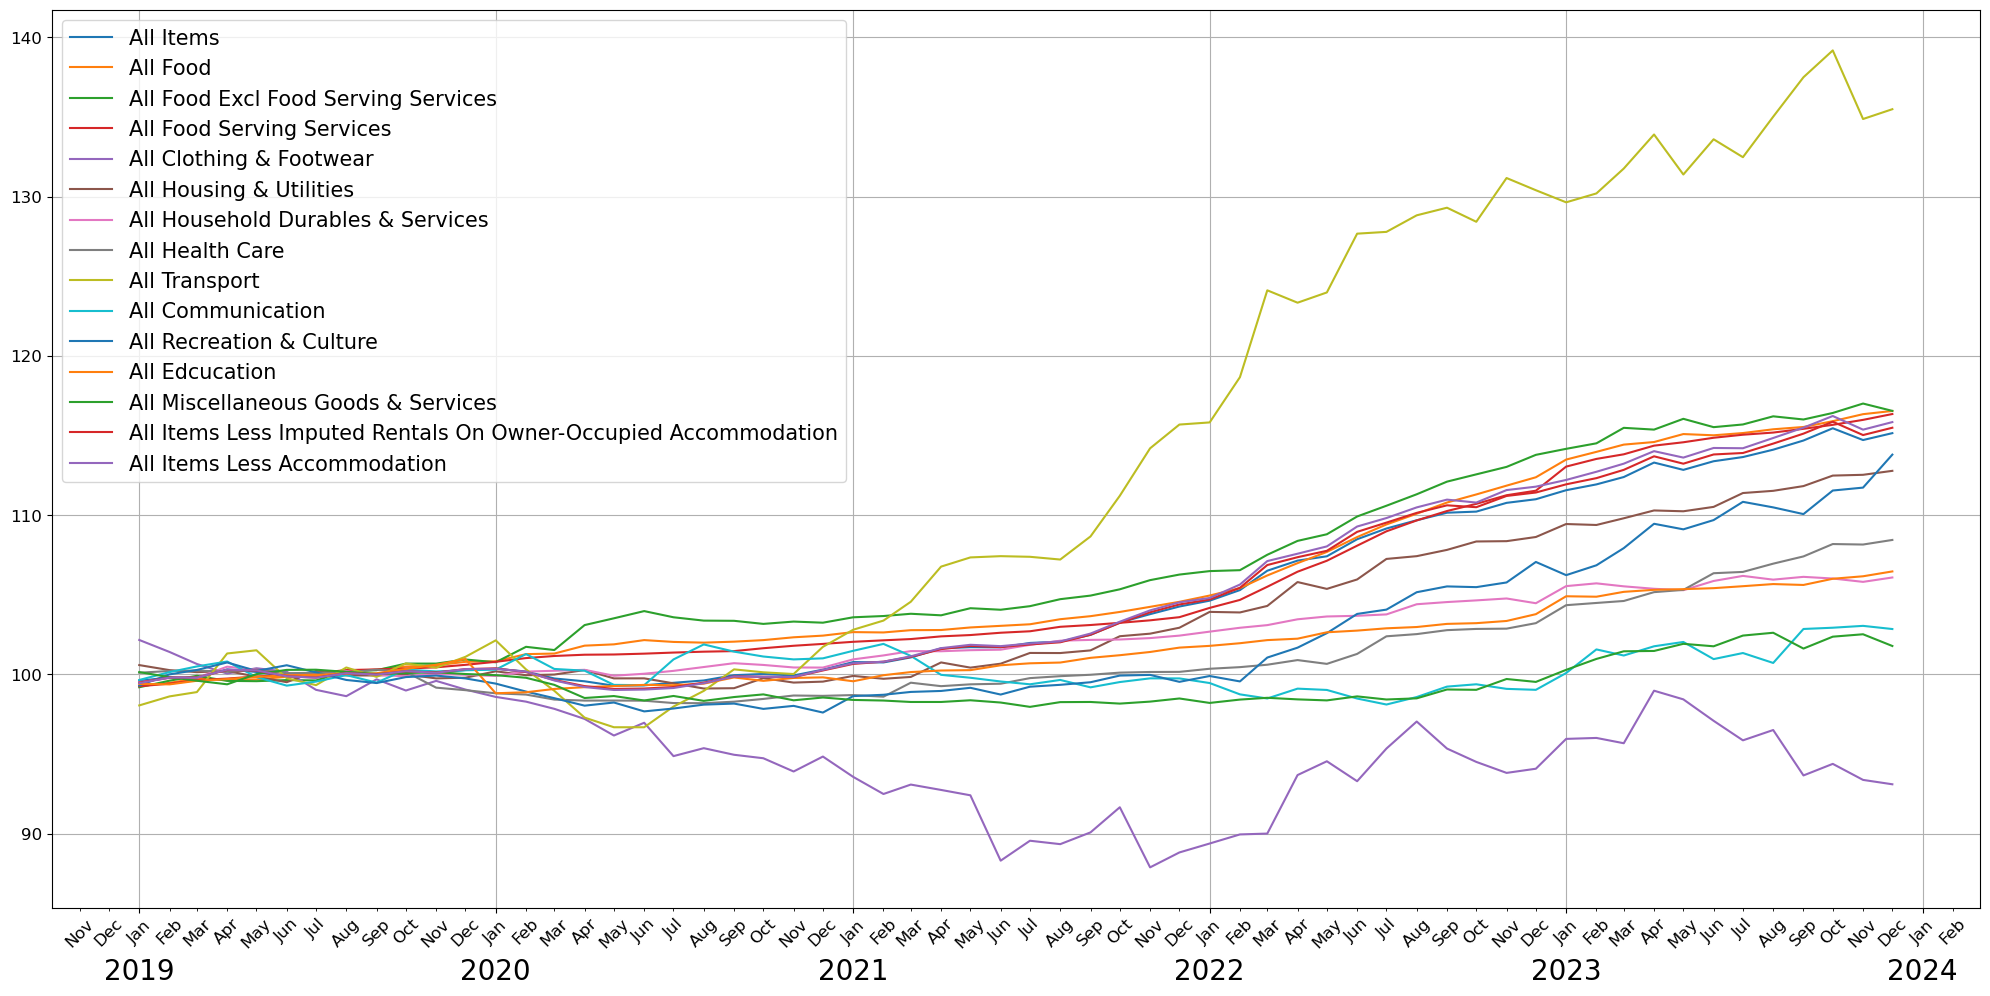

In [7]:
fig, ax=plt.subplots(1, 1, figsize=(20, 10))

#specify start and end date in yyyy-mm-dd  string format
variable_date_all_plot('2019-1-1', '2023-12-1')
format_plot()

#enable for tooltip 
#cursor(hover = True)


### Analysis
From the interactive plot, there is an overall upward trend in the CPI for all categories except for *Clothings and Footwear*. On average, *All times* saw an increase in CPI by about 15% relative to base year 2019. <br> *Transportation* cost increased the most significantly since 2021. Its CPI saw an increased by about 35% and peaked at 139 points in Oct 2023. <br> On the other hand, the *Clothing and Footwear* category saw a decline in CPI since the start of 2020 and had been fluctualting between 88 and 98 points. 

## Indepth analysis on individual category 

In [8]:
#Function 1: cleaning up data, specify category and start date
def sub_data(category_name, start_date): # x is the sub category name
    df= raw_df.loc[(cat==category_name) & (~sub_cat.str.contains("All"))]
    df = df.droplevel([0],axis=0) #drop category index 
    df = df.drop(columns = ['Data Series']) #drop data series column 
    df = df.reset_index()
    df = df.transpose()
    #taking first row as new headers 
    new_header = df.iloc[0]
    df.columns = new_header
    df = df[1:] #take the data less the header row
    df = df.reset_index(names = 'Date') #renaming index
    df= df[df['Date']>=start_date]
    return df


In [19]:
#Function 2: plotting
def sub_plot (sub_data): 
    x = sub_data['Date']
    for i in sub_data.columns[1:]:
        y = sub_data[i]
        ax = plt.plot(x,y, label = i)
    get_current_axes=plt.gca()
    ymin,ymax = get_current_axes.get_ylim() #returns a tuple (ymin, ymax)
    #xmin = mdates.date2num(min(sub_data['Date']))
    xmax = mdates.date2num(max(sub_data['Date']))
    xmin =  mdates.date2num(max(sub_data['Date']) - relativedelta(months=+12)) #finding one year before xmax using dateutil lib
    xwidth = xmax -xmin
    get_current_axes.add_patch(Rectangle((xmin,ymin),xwidth,(ymax-ymin),facecolor="lavenderblush"))
    plt.grid()
    return ax
    


### Sample plots


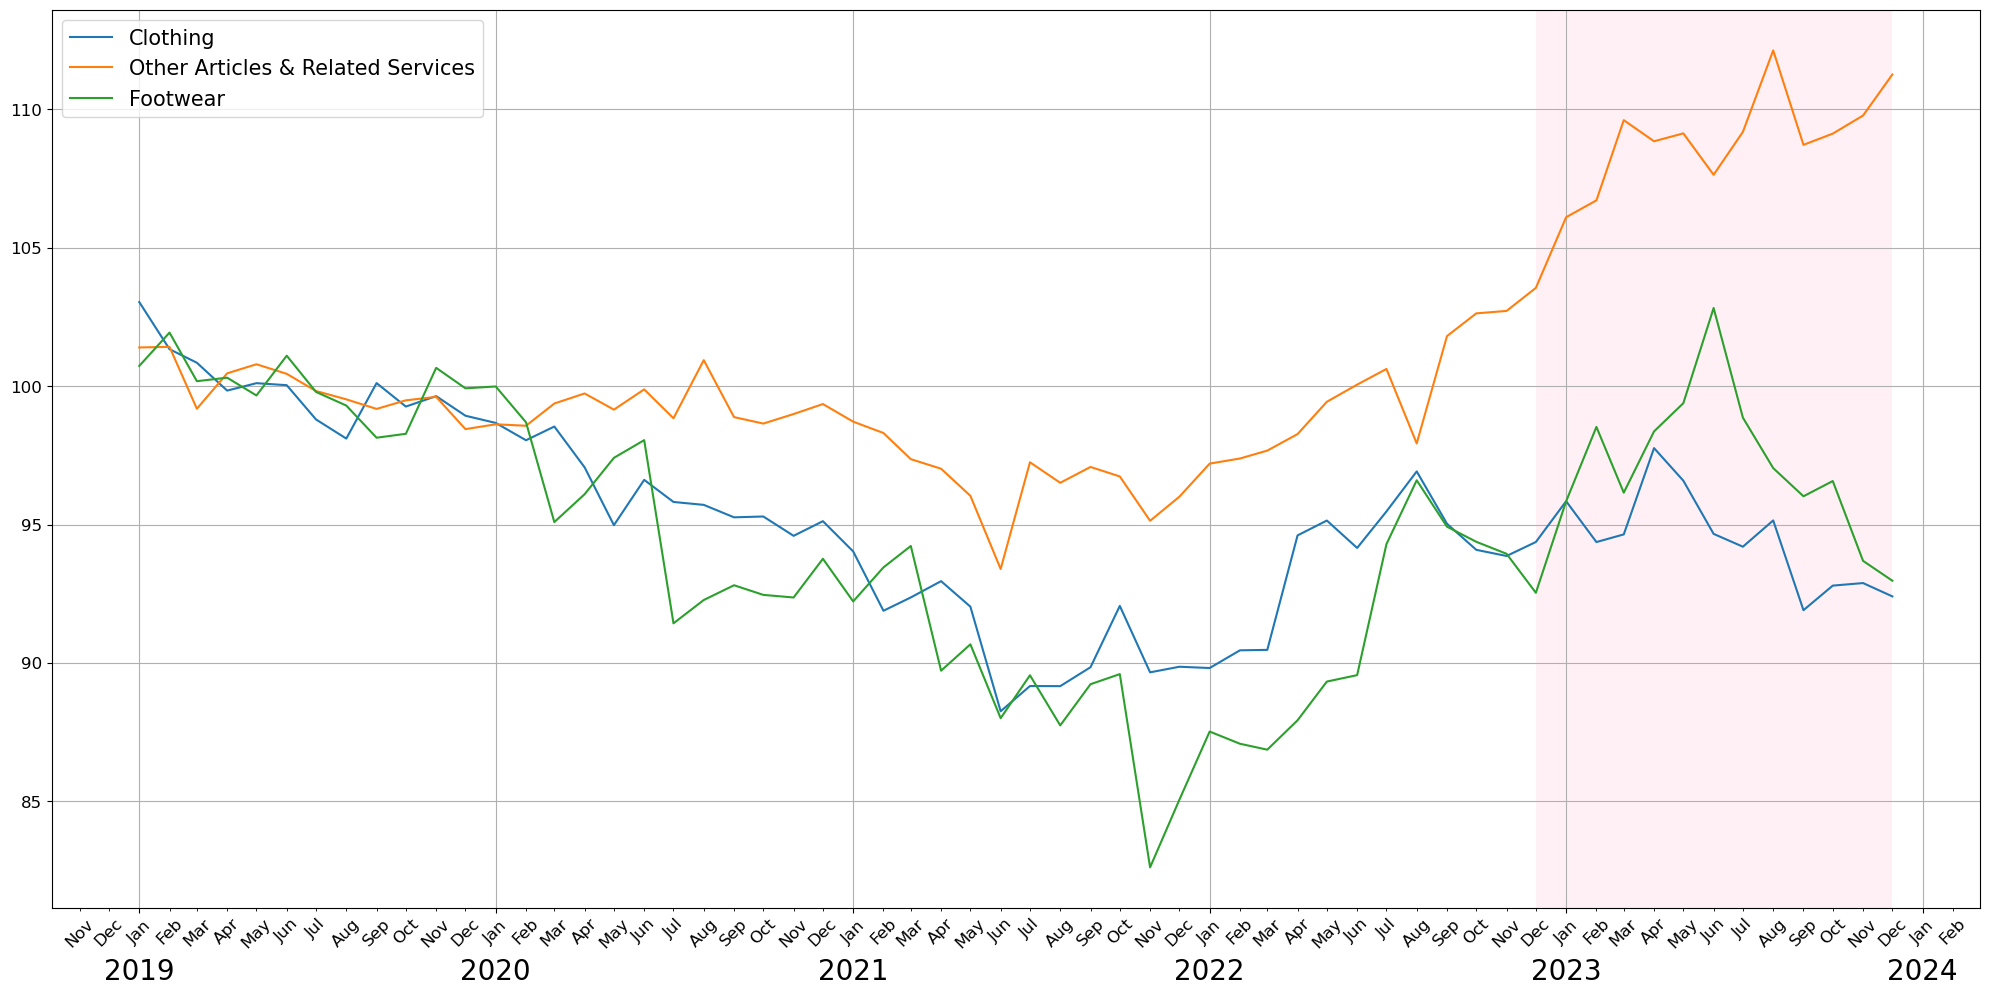

In [20]:
#Clothing & Footwear
Clothing_Footwear = sub_data( 'Clothing & Footwear', "2019-01-01")
fig, ax=plt.subplots(1, 1, figsize=(20, 10))
sub_plot(Clothing_Footwear)
format_plot()

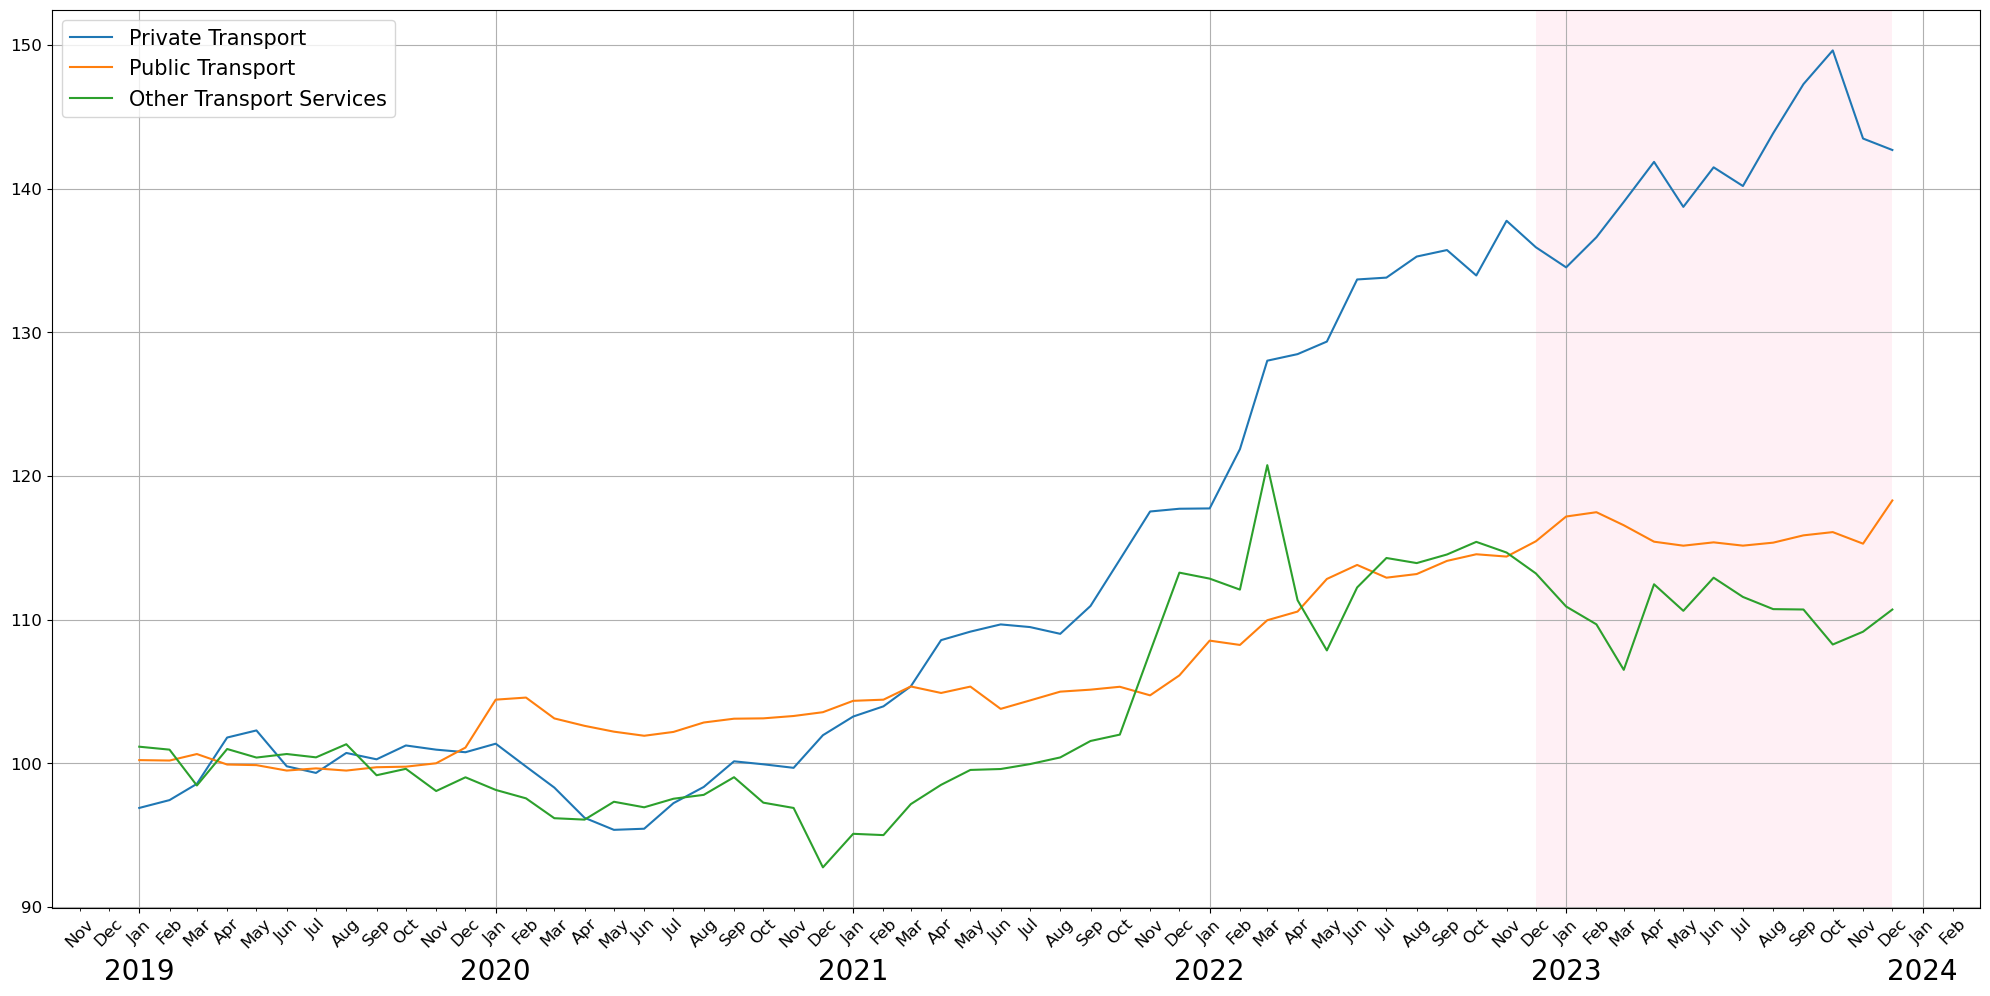

In [35]:
#Transport
Transport = sub_data('Transport',"2019-01-01")
fig, ax=plt.subplots(1, 1, figsize=(20, 10))
sub_plot(Transport)
format_plot()

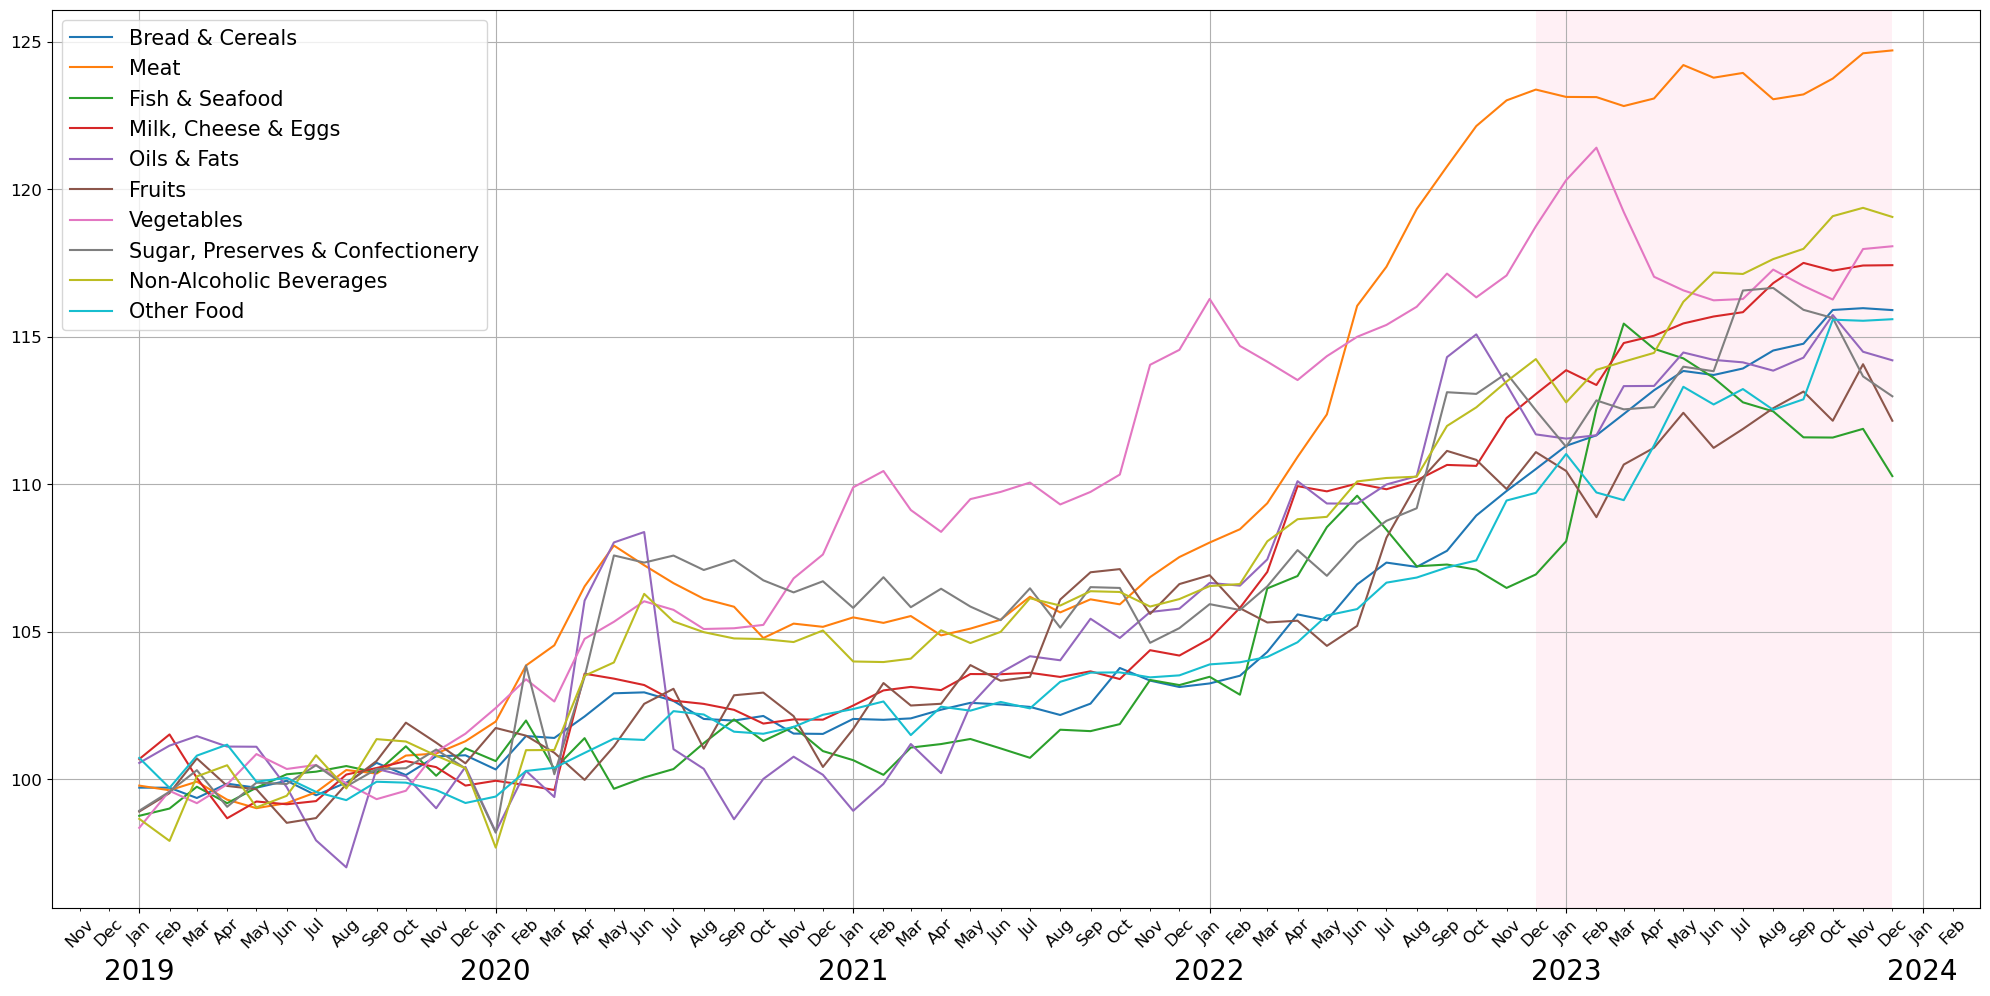

In [36]:
#Food Excl Food Serving Services
Food_Excl_Food_Serving_Services = sub_data('Food Excl Food Serving Services', "2019-01-01")
fig, ax=plt.subplots(1, 1, figsize=(20, 10))
sub_plot(Food_Excl_Food_Serving_Services)
format_plot()

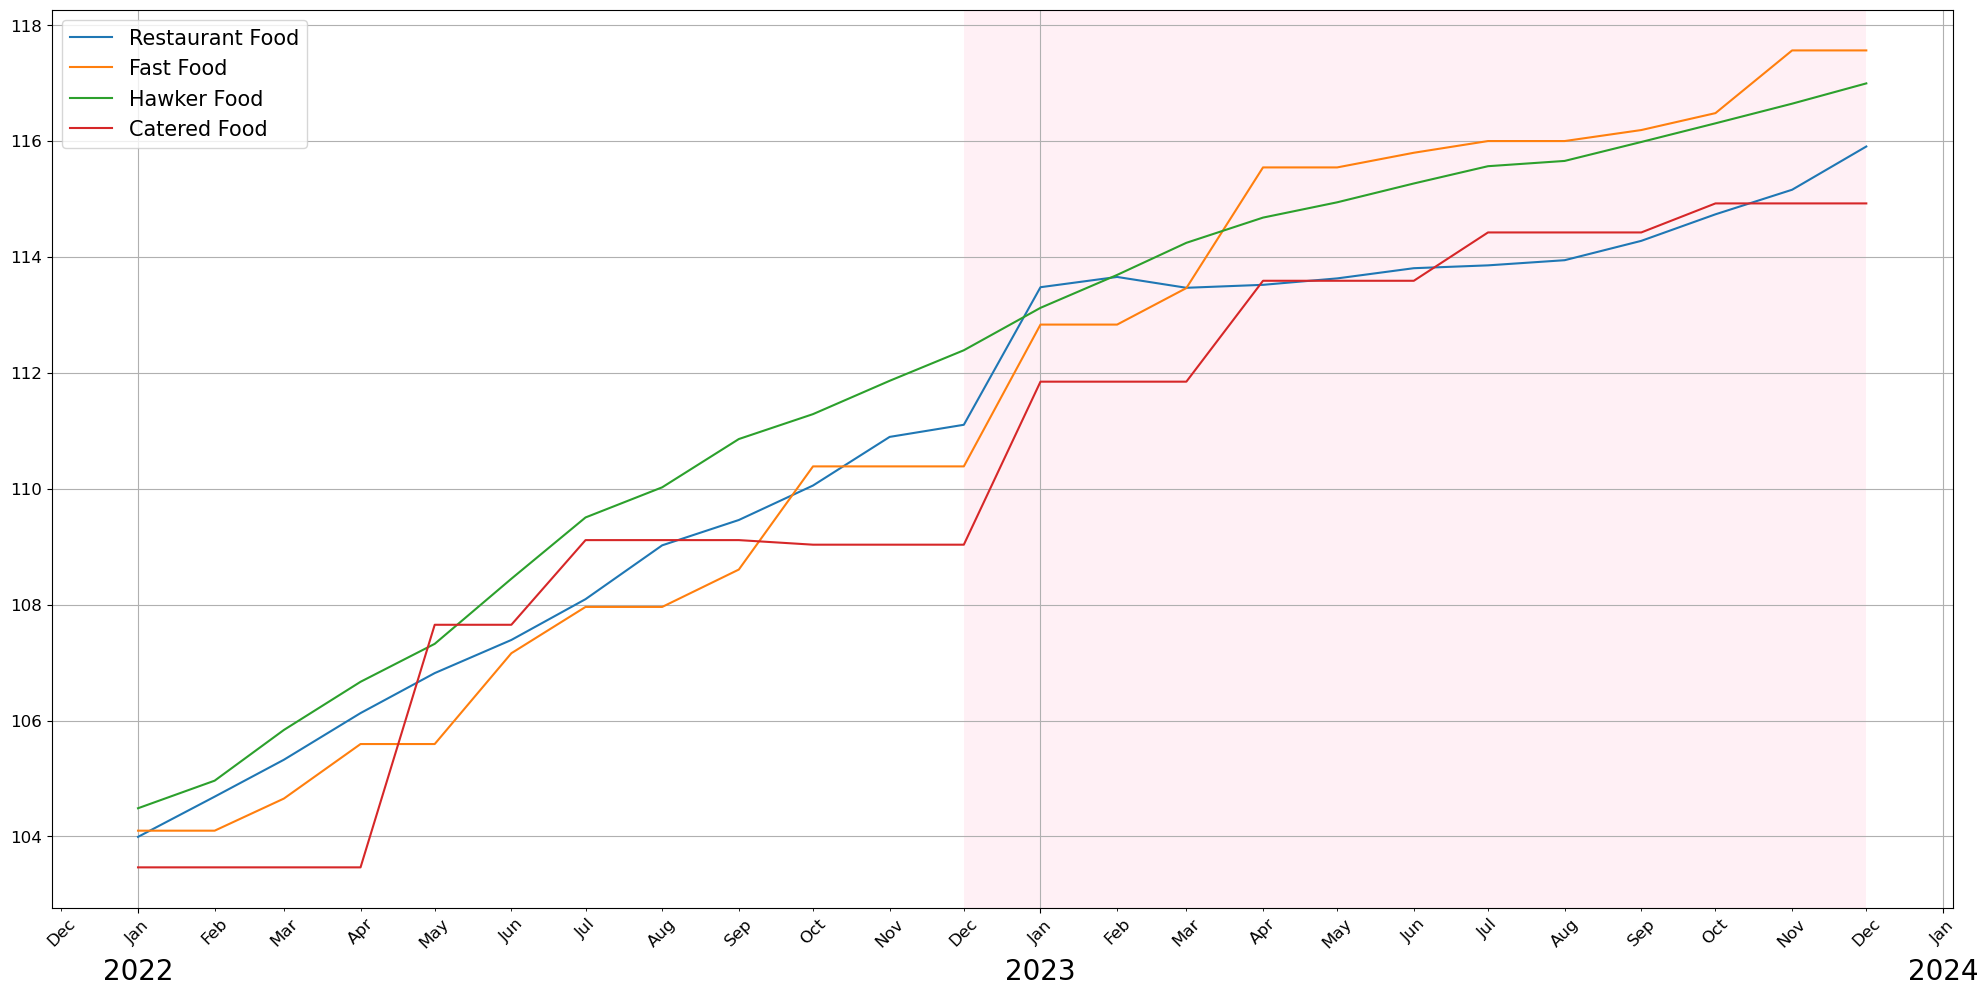

In [39]:
#Food Serving Services
Food_Serving_Services = sub_data('Food Serving Services', "2022-01-01")
fig, ax=plt.subplots(1, 1, figsize=(20, 10))
sub_plot(Food_Serving_Services)
format_plot()

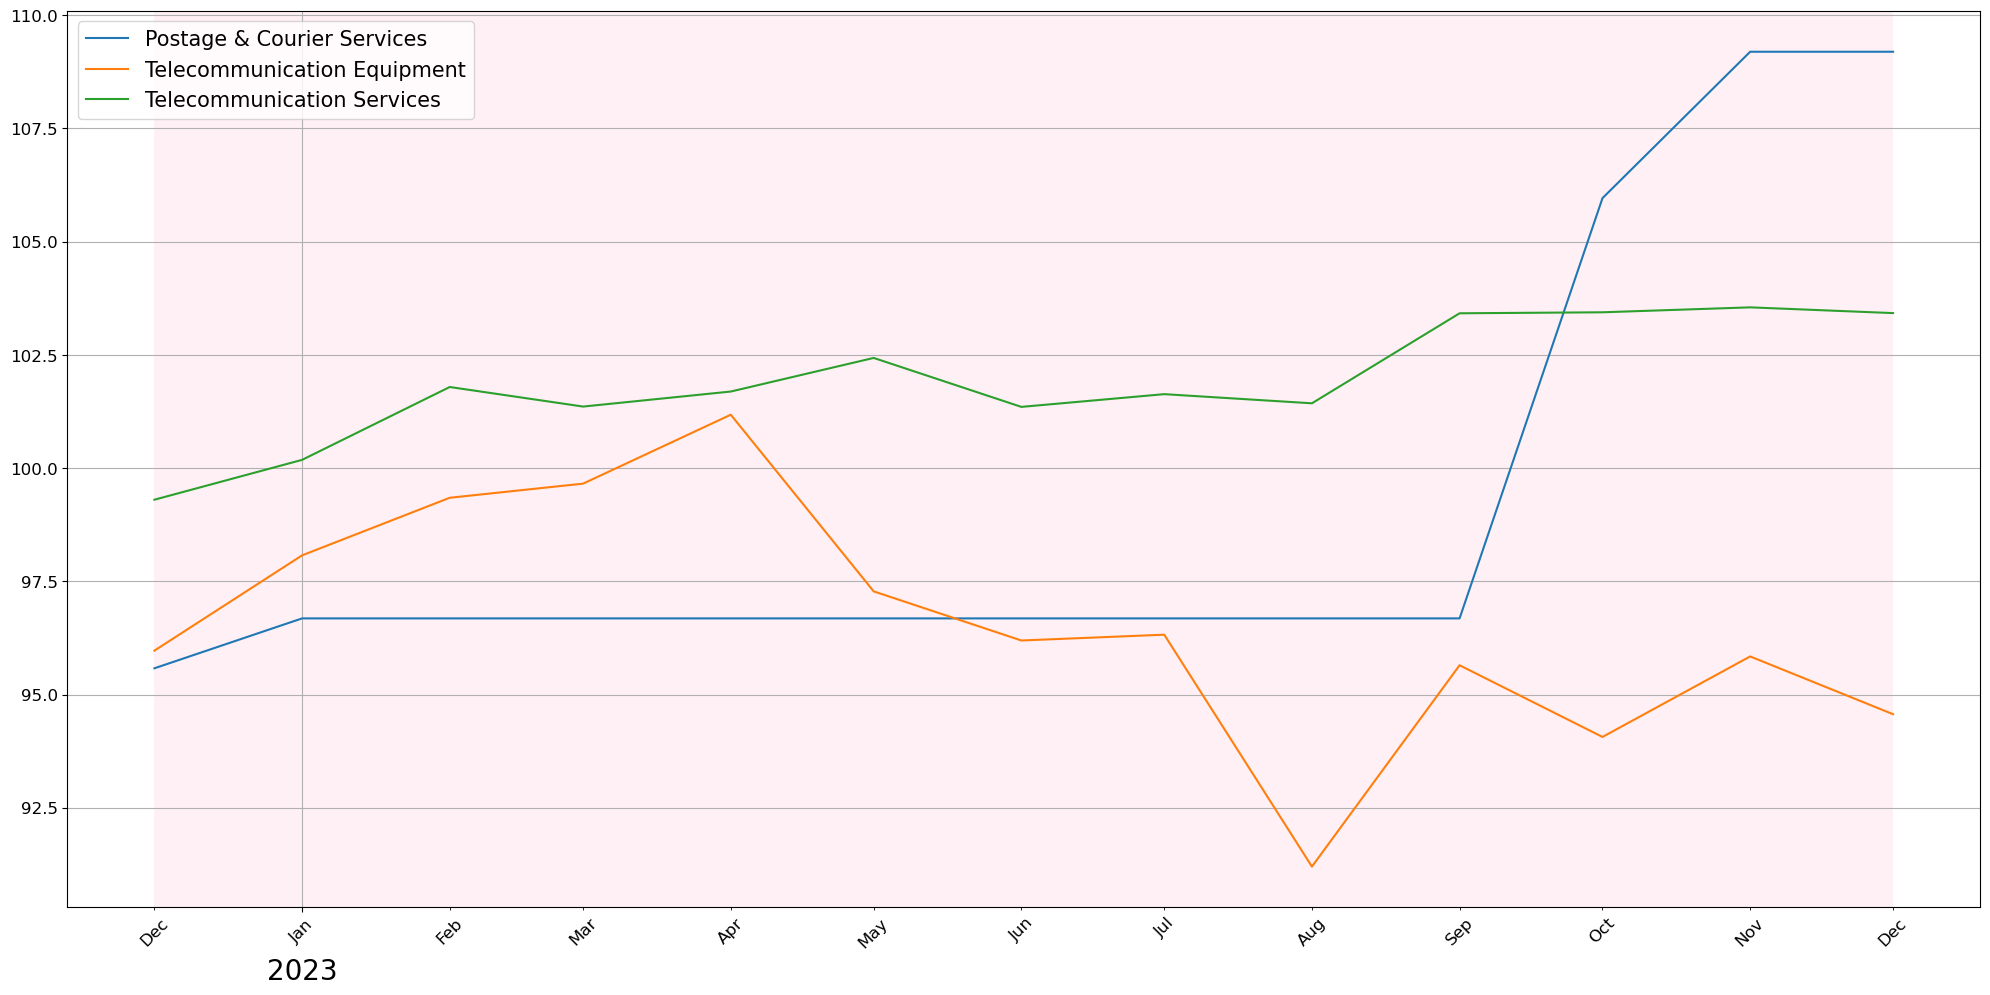

In [40]:
# Communication
Communication = sub_data('Communication', "2022-12-01")
fig, ax=plt.subplots(1, 1, figsize=(20, 10))
sub_plot(Communication)
format_plot()

### M-O-M & Y-O-Y Percentage Change

In [21]:
#column in string format instead of datetime
raw_str = raw.copy()
raw_str.dropna(inplace = True) 


In [22]:
#M-O-M (nov - dec 2023)
mom = round(((raw_str['2023 Dec']/raw_str['2023 Nov'])-1)*100,2).to_frame('M-O-M Change (%)')
#Y-O-Y (dec 2022 - dec 2023)
yoy_bymonth = round(((raw_str['2023 Dec']/raw_str['2022 Dec'])-1)*100,2).to_frame('Y-O-Y Change (%)')
overall = mom.merge(yoy_bymonth, left_on = ["Category","Sub_Category"], right_on = ["Category","Sub_Category"] )
overall_filt = overall[~overall.index.get_level_values(1).str.contains("All")]
overall

M-O-M Change (%)  \
Category                                           Sub_Category                                                           
All Items                                          All Items                                                       0.38   
Food                                               All Food                                                        0.17   
Food Excl Food Serving Services                    All Food Excl Food Serving Services                            -0.39   
                                                   Bread & Cereals                                                -0.06   
                                                   Meat                                                            0.08   
                                                   Fish & Seafood                                                 -1.43   
                                                   Milk, Cheese & Eggs                                             0.01   
                                                   Oils & Fats                                                    -0.25   
                                                   Fruits                                                         -1.68   
                                                   Vegetables                                                      0.08   
                                                   Sugar, Preserves & Confectionery                               -0.59   
                                                   Non-Alcoholic Beverages                                        -0.26   
                                                   Other Food                                                      0.05   
Food Serving Services                              All Food Serving Services                                       0.32   
                                                   Restaurant Food                                                 0.65   
                                                   Fast Food                                                       0.00   
                                                   Hawker Food                                                     0.30   
                                                   Catered Food                                                    0.00   
Clothing & Footwear                                All Clothing & Footwear                                        -0.29   
                                                   Clothing                                                       -0.52   
                                                   Other Articles & Related Services                               1.35   
                                                   Footwear                                                       -0.77   
Housing & Utilities                                All Housing & Utilities                                         0.22   
                                                   Accommodation                                                   0.25   
                                                   Utilities & Other Fuels                                         0.01   
Household Durables & Services                      All Household Durables & Services                               0.26   
                                                   Household Durables                                              0.62   
                                                   Household Services & Supplies                                   0.02   
Health Care                                        All Health Care                                                 0.27   
                                                   Medicines & Health Products                                    -0.00   
                                                   Outpatient Services                                             0.25   
                                            

### Horizontal view

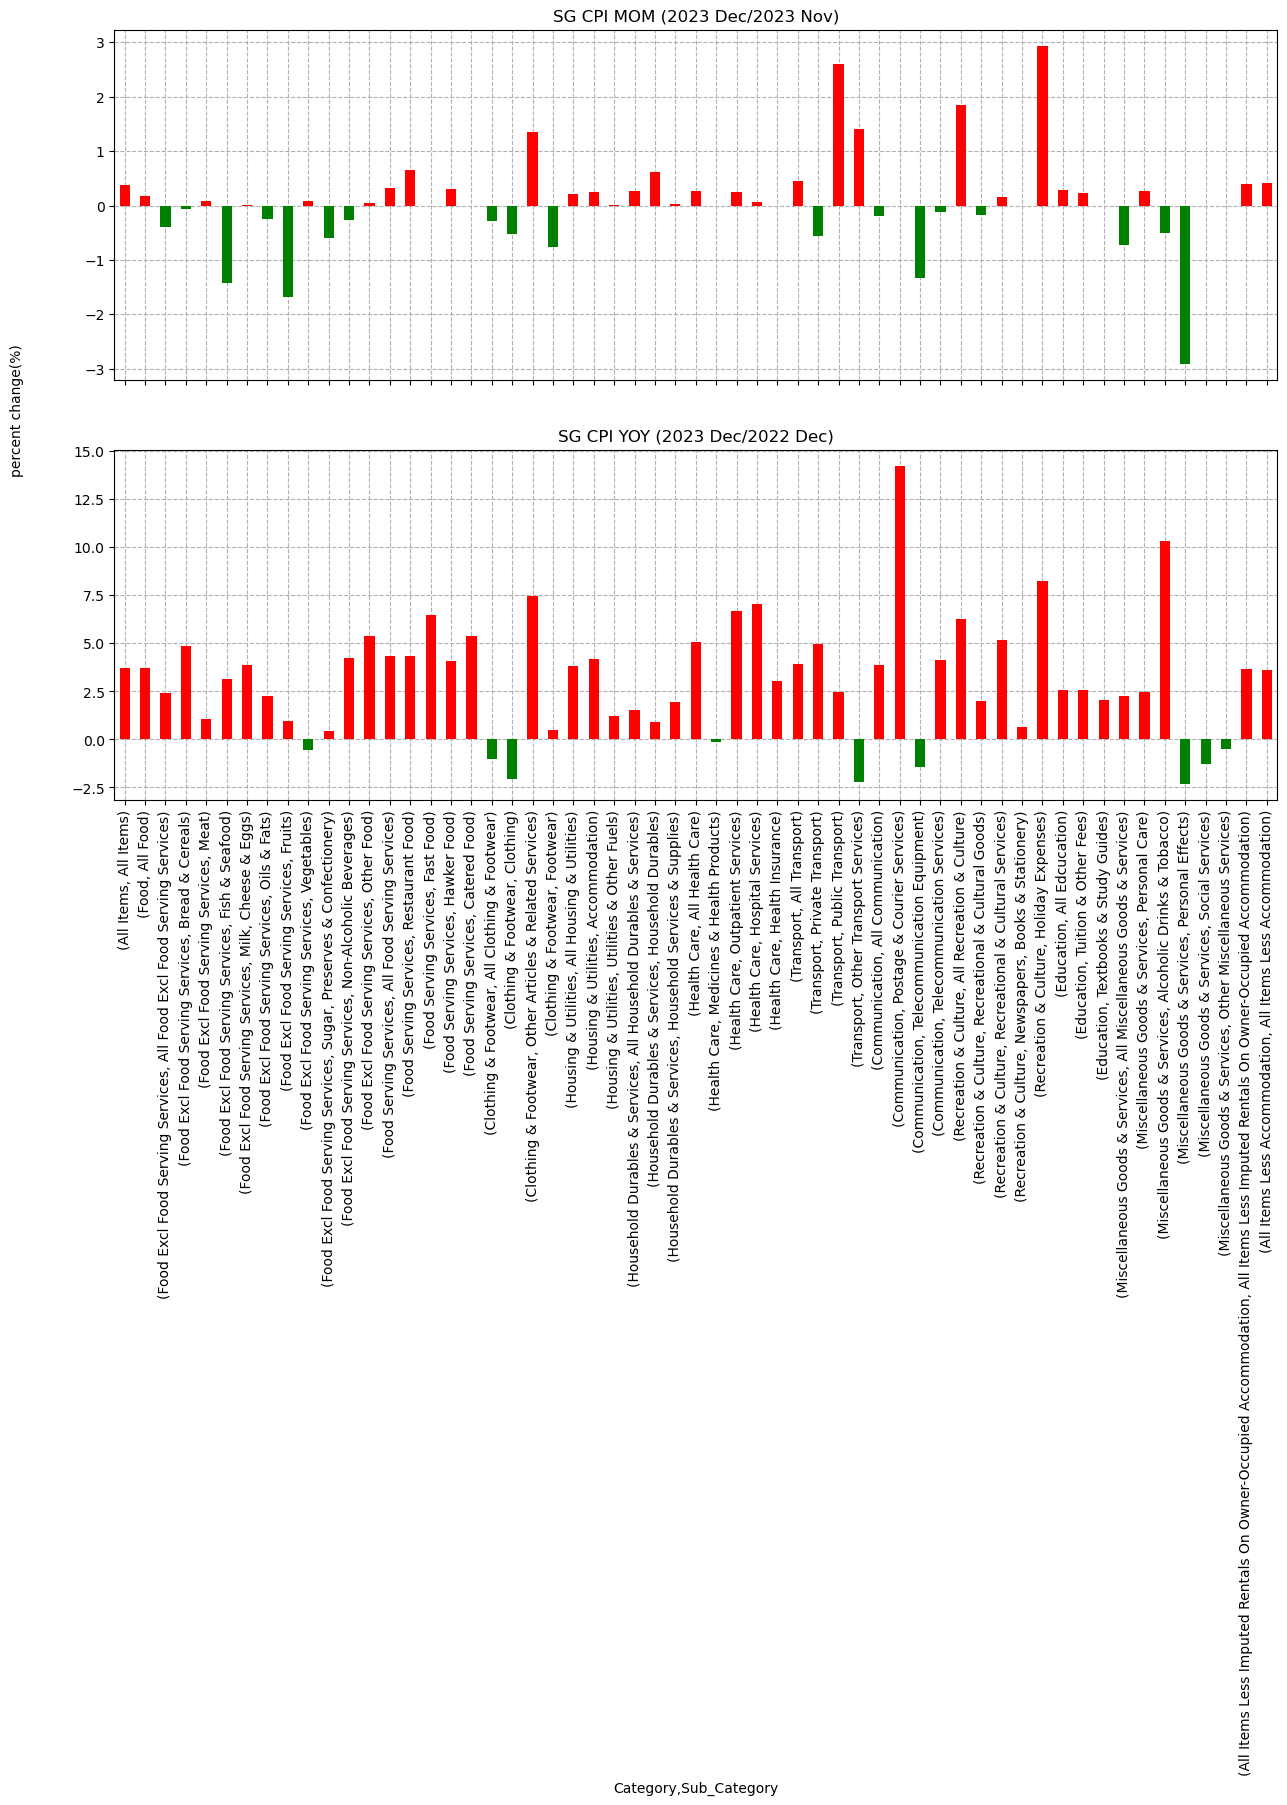

In [28]:
#combine both yoy and mom plots with subplot
colors1 = ["red" if x > 0 else "green" for x in overall['M-O-M Change (%)'].values]
colors2 = ["red" if x > 0 else "green" for x in overall['Y-O-Y Change (%)'].values]
#creating subplots
fig, axs = plt.subplots(2,1,sharex= True,  figsize = (15,10))
overall['M-O-M Change (%)'].plot.bar(ax=axs[0], color = colors1, zorder = 2)
overall['Y-O-Y Change (%)'].plot.bar(ax=axs[1], color =colors2, zorder =2)
#subplot titles
axs[0].set_title("SG CPI MOM (2023 Dec/2023 Nov)")
axs[1].set_title("SG CPI YOY (2023 Dec/2022 Dec)")
#change yaxix  label
fig.text(0.06, 0.5, 'percent change(%)', ha='center', va='center', rotation='vertical')
#subplot grids
axs[0].grid(zorder =1,linestyle='--' )
axs[1].grid(zorder =1,linestyle='--')
#adjusting space between subplots
plt.subplots_adjust(hspace=0.2)



### Vertical View (improved)

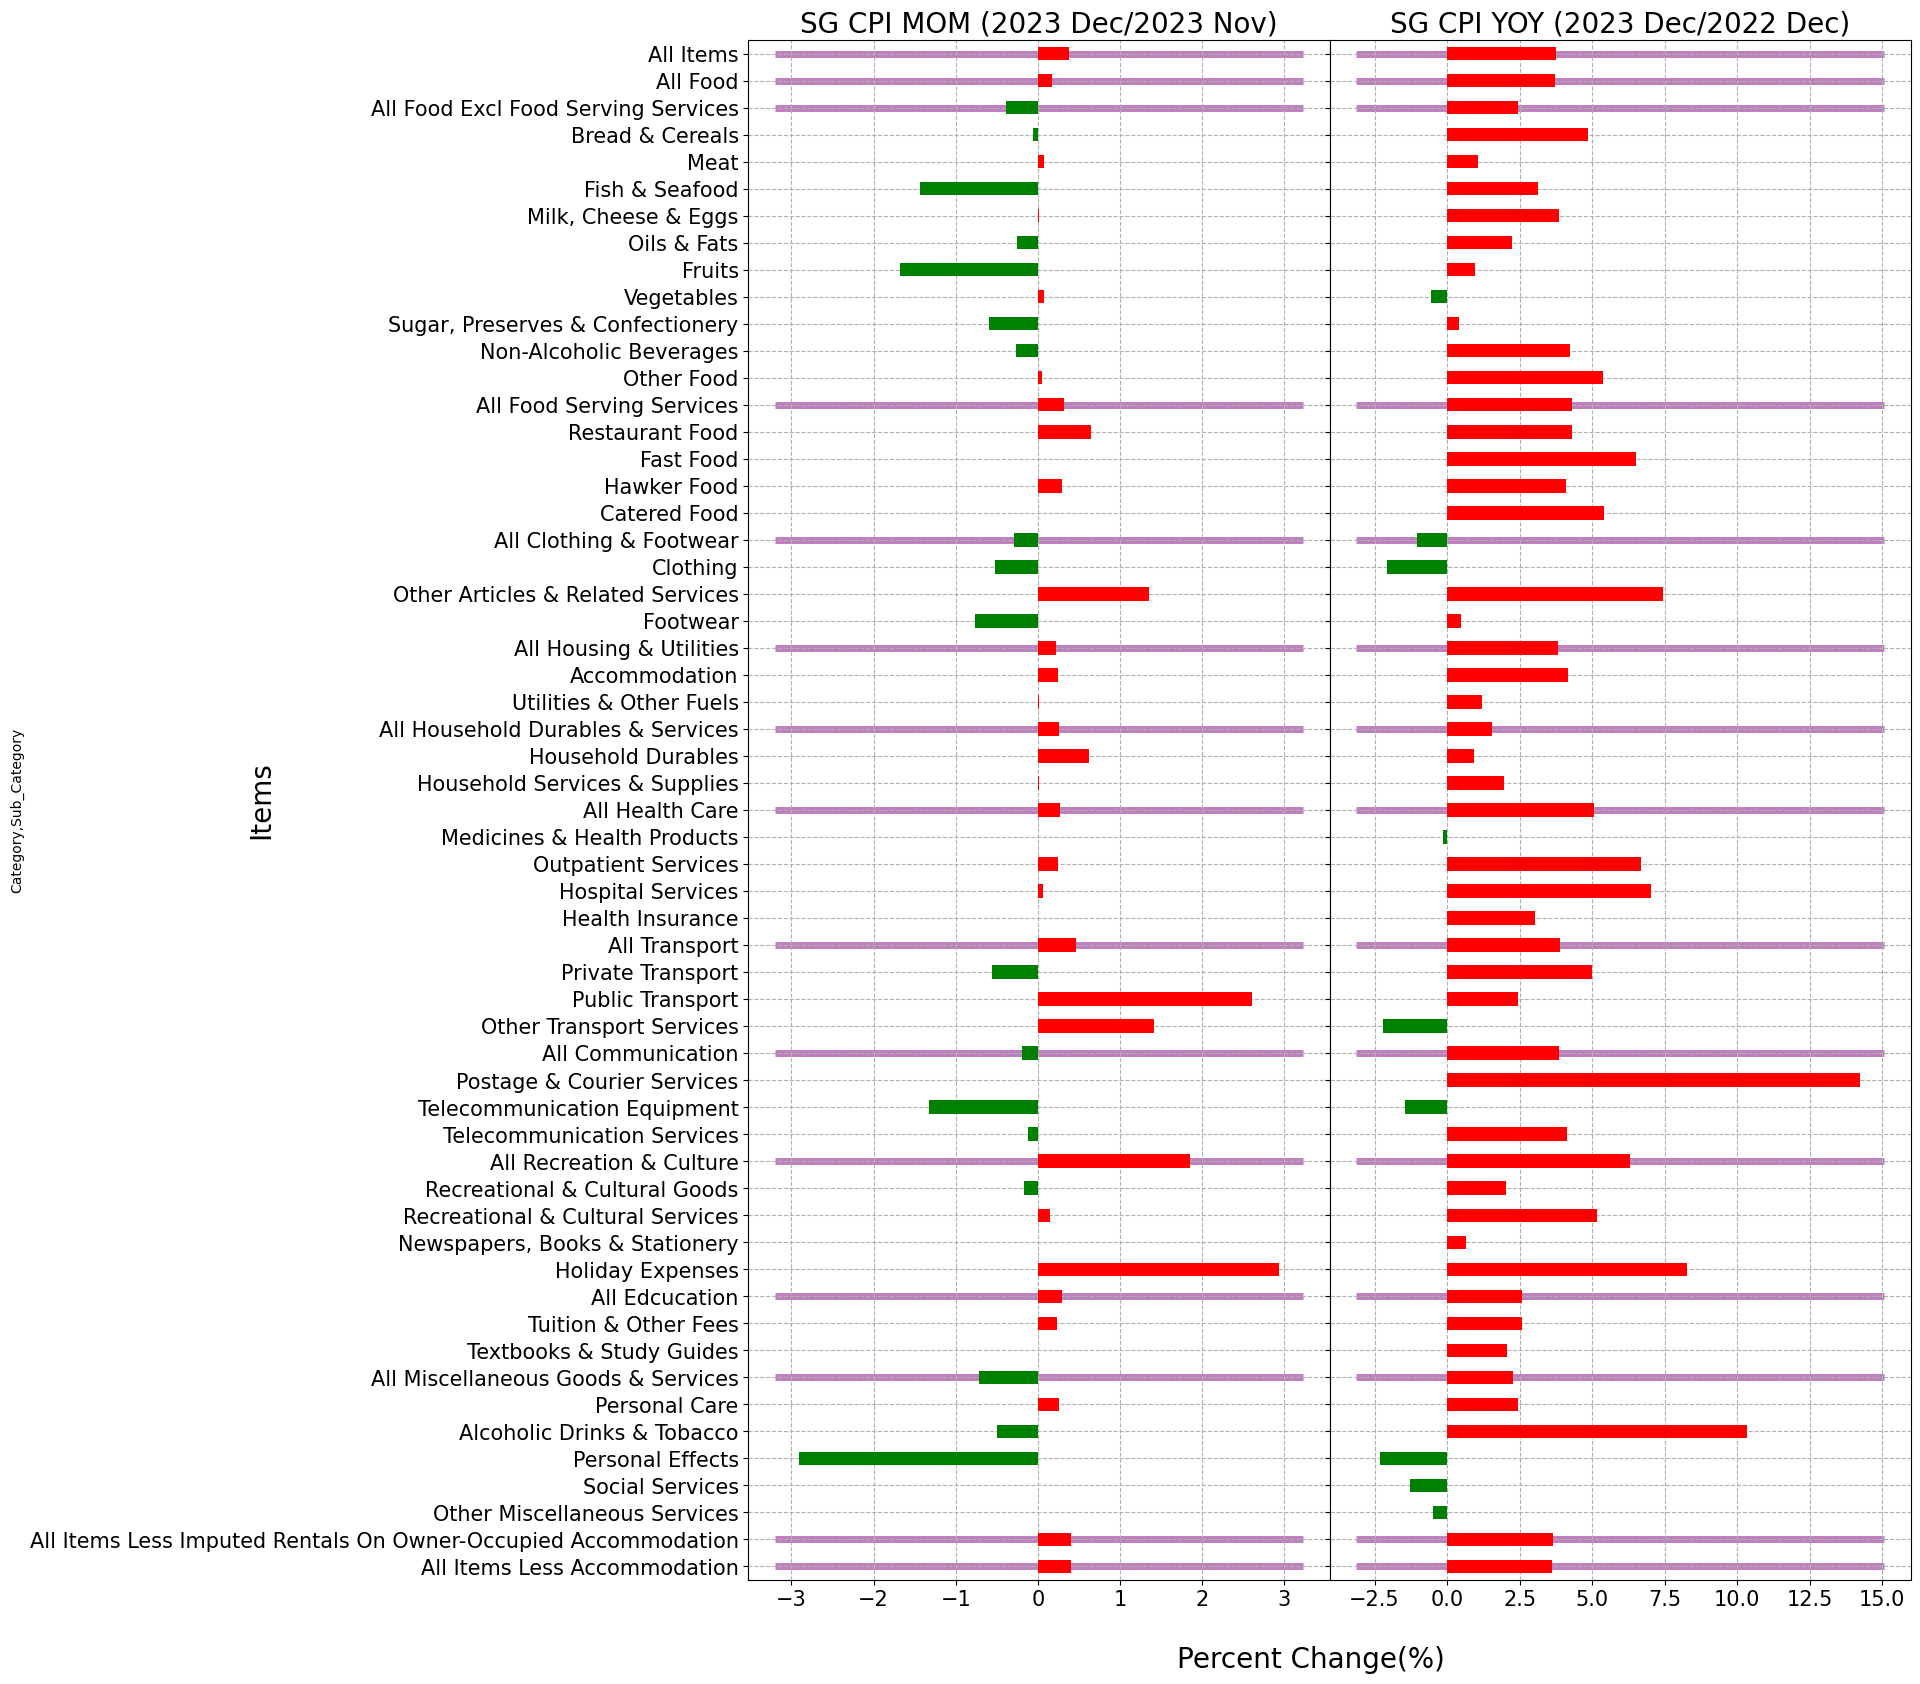

In [45]:
#%matplotlib 
#combine both yoy and mom plots with subplot
colors1 = ["red" if x > 0 else "green" for x in overall['M-O-M Change (%)'].values]
colors2 = ["red" if x > 0 else "green" for x in overall['Y-O-Y Change (%)'].values]

#creating subplots
fig, axs = plt.subplots(1,2,sharey= True, figsize = (15,20))
overall['M-O-M Change (%)'].plot.barh(ax=axs[0], color = colors1, zorder = 2)
overall['Y-O-Y Change (%)'].plot.barh(ax=axs[1], color =colors2, zorder =2)

#changing yticks to show only sub cat
plt.yticks(range(len(overall.index.get_level_values(1))),overall.index.get_level_values(1))
axs[0].tick_params(axis = 'y', labelsize = 15)
axs[0].tick_params(axis = 'x', labelsize = 15) 
axs[1].tick_params(axis = 'x', labelsize = 15) 

#subplot titles
axs[0].set_title("SG CPI MOM (2023 Dec/2023 Nov)",  fontsize = 20)
axs[1].set_title("SG CPI YOY (2023 Dec/2022 Dec)",  fontsize = 20)

#change y and x axis label across subplots
fig.text(-0.2, 0.5, 'Items', ha='center', va='center', rotation='vertical', size =20)
fig.text(0.5, 0.07, 'Percent Change(%)', ha='center', va='center', size = 20)

#subplot grids
#zorder: layer order, 
axs[0].grid(zorder =1,linestyle='--')
axs[1].grid(zorder =1,linestyle='--')
axs[0].invert_yaxis()
#axs[1].invert_yaxis()

#adjust space between subplots
plt.subplots_adjust(wspace=0)

#horizontal lines at "All" ylabel to seperate each category
arr = list(overall.index.get_level_values(1).str.contains('All'))
val = [i for i, e in enumerate(arr) if e == True] #hline ypos only take in numerical value
for c in axs:
    Xmin, Xmax = c.get_xlim()
    c.hlines(val, xmin=Xmin, xmax=Xmax, colors='purple', linestyles='solid',zorder=1.5,alpha = 0.5, linewidth=5)   

